In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [104]:
df=pd.read_csv('logistic_regression.csv')

print(df.head())
print(df.shape)


   loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0

In [105]:
# print(df.describe())
# print(df.info())
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [106]:
df=df[~df['emp_title'].isna() & ~df['emp_length'].isna() & ~df['title'].isna() & ~df['mort_acc'].isna() & ~df['revol_util'].isna()]
df.isna().sum()

df.shape

(335867, 27)

loan_status
Fully Paid     269555
Charged Off     66312
Name: count, dtype: int64


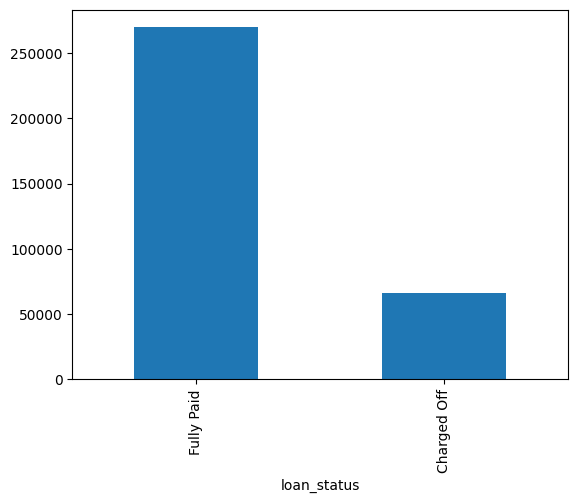

In [107]:
df.loan_status.value_counts().plot(kind='bar')
print(df.loan_status.value_counts())
#print(round(np.sum(df.loan_status)/df.shape[0]),2)

imbalance propportion = 19.7%. This is mildly imabalnced dataset. https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

In [108]:
# for f in df.columns:
#     print(f + '-' + str(df[f].dtypes))

In [109]:
df['verification_status'].value_counts()
# df['verification_status']=df['application_type'].replace({'Not Verified':0,'Source Verified':1,'Verified':2})
# df['verification_status'].value_counts()


verification_status
Source Verified    115687
Verified           112520
Not Verified       107660
Name: count, dtype: int64

Cleaning categorical variables

In [110]:
df=df.drop(columns='emp_title')

df['address_substr']=df['address'].agg(lambda x: x[-8:])
df[['state', 'po_number']]=df['address_substr'].str.split(' ',expand=True)
df=df.drop(columns=['address','address_substr','po_number'])

df.loc[~df['purpose'].str.match('debt_consolidation'),'purpose']='other'
# df['purpose'][~df['purpose'].str.match('debt_consolidation')]='other'

df['home_ownership']=df['home_ownership'].replace({'OTHER':'other','NONE':'other','ANY':'other'})
df['application_type']=df['application_type'].replace({'JOINT':'nonIndv','DIRECT_PAY':'nonIndv'})

df['verification_status']=df['verification_status'].replace({'Not Verified':0,'Source Verified':1,'Verified':2})


df.loc[~df['state'].str.contains('AP|AE|AA'),'state']='other'
df.loc[df['state'].str.contains('AP|AE|AA'),'state']='AP_AE_AA'
df['state_AP_AE_AA']=df['state']
df.loc[df['state'].str.contains('AP|AE|AA'),'state_AP_AE_AA']='1'
df.loc[~df['state'].str.contains('AP|AE|AA'),'state_AP_AE_AA']='0'
df=df.drop(columns=['state'])
df['state_AP_AE_AA']=pd.to_numeric(df['state_AP_AE_AA'])

df['loan_status']=df['loan_status'].replace({'Fully Paid':1,'Charged Off':0})

/tmp/ipykernel_5646/752999988.py:3: FutureWarning: using <function <lambda> at 0x7a2da660e710> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df['address_substr']=df['address'].agg(lambda x: x[-8:])
/tmp/ipykernel_5646/752999988.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['verification_status']=df['verification_status'].replace({'Not Verified':0,'Source Verified':1,'Verified':2})
/tmp/ipykernel_5646/752999988.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [111]:
# fig, ax = plt.subplots(nrows=2,ncols=3)
# fig.set_figwidth(15)

# # for inx in range(len(categorical_features)):
# #     print(df.loc[:,categorical_features[inx]].value_counts())
# plt.xticks(rotation=45)
# for axrow in range(2):
#     for axcol in range(3):
#         featnum=axrow*3+axcol
#         if featnum <= len(categorical_features)-1:
#             a=df[[categorical_features[featnum]]].value_counts().reset_index()    
#             ax[axrow,axcol].bar(a.iloc[:,0],a.iloc[:,1])

# plt.show()

In [112]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state_AP_AE_AA
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,1,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,2,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,0


Ordinal variables

In [113]:
# df['term']=df['term'].astype(str)
# df.loc[df['term'].str.contains('36'),'term']=0
# df.loc[df['term'].str.contains('60'),'term']=1

# df['emp_length_gt_10yr']=df['emp_length']
# df.loc[df['emp_length'].str.contains('10'),'emp_length_gt_10yr']=1
# df.loc[~df['emp_length'].str.contains('10'),'emp_length_gt_10yr']=0
# # df['emp_length_gt_10yr'][df['emp_length'].str.contains('10')]=1
# # df['emp_length_gt_10yr'][~df['emp_length'].str.contains('10')]=0
# df=df.drop(columns=['emp_length'])

In [114]:
df['term']=df['term'].astype(str)
df.loc[df['term'].str.contains('36'),'term']='0'
df.loc[df['term'].str.contains('60'),'term']='1'
df['term']=df['term'].astype(int)

grade_map={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
df['grade']=df['grade'].astype(str)
df['sub_grade_level']=df['sub_grade'].agg(lambda x: x[-1]).astype(int)
df['grade_level']=df['grade'].replace(grade_map).astype(int)
df['grade_score']=df['grade_level']*7+ df['sub_grade_level']
df=df.drop(columns=['grade','sub_grade','sub_grade_level','grade_level'])

df['emp_length_gt_10yr']=df['emp_length']
df.loc[df['emp_length'].str.contains('10'),'emp_length_gt_10yr']=1
df.loc[~df['emp_length'].str.contains('10'),'emp_length_gt_10yr']=0
# df['emp_length_gt_10yr'][df['emp_length'].str.contains('10')]=1
# df['emp_length_gt_10yr'][~df['emp_length'].str.contains('10')]=0
df=df.drop(columns=['emp_length'])


df['pub_rec']=df['pub_rec'].astype(int)
df['any_pub_rec']=df['pub_rec']
df.loc[df['pub_rec']>0,'any_pub_rec']=1
# df['any_pub_rec'][df['pub_rec']>0]=1
df=df.drop(columns='pub_rec')


df['mort_acc_lt_2']=df['mort_acc']
df.loc[df['mort_acc']<2,'mort_acc_lt_2']=1
df.loc[df['mort_acc']>=2,'mort_acc_lt_2']=0
# df['mort_acc_lt_2'][df['mort_acc']<2]=1
# df['mort_acc_lt_2'][df['mort_acc']>=2]=0
df=df.drop(columns='mort_acc')


df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].astype(int)
df['any_bankruptcies']=df['pub_rec_bankruptcies']
df.loc[df['pub_rec_bankruptcies']==0,'any_bankruptcies']=0
df.loc[df['pub_rec_bankruptcies']>0,'any_bankruptcies']=1
# df['any_bankruptcies'][df['pub_rec_bankruptcies']==0]=0
# df['any_bankruptcies'][df['pub_rec_bankruptcies']>0]=1
df=df.drop(columns='pub_rec_bankruptcies')

df[['issue_mon', 'issue_year']]=df['issue_d'].str.split('-',expand=True)
df[['cr_line_mon', 'cr_line_year']]=df['earliest_cr_line'].str.split('-',expand=True)

month_map={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df['issue_mon']=df['issue_mon'].replace(month_map)
df['cr_line_mon']=df['cr_line_mon'].replace(month_map)
df=df.drop(columns=['issue_d','earliest_cr_line'])

/tmp/ipykernel_5646/669222393.py:8: FutureWarning: using <function <lambda> at 0x7a2da68b9e10> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df['sub_grade_level']=df['sub_grade'].agg(lambda x: x[-1]).astype(int)
/tmp/ipykernel_5646/669222393.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['grade_level']=df['grade'].replace(grade_map).astype(int)
/tmp/ipykernel_5646/669222393.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['issue_mon']=df['issue_mon'].repla

In [115]:
# df['issue_year'].value_counts()

In [116]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,purpose,title,...,state_AP_AE_AA,grade_score,emp_length_gt_10yr,any_pub_rec,mort_acc_lt_2,any_bankruptcies,issue_mon,issue_year,cr_line_mon,cr_line_year
0,10000.0,0,11.44,329.48,RENT,117000.0,0,1,other,Vacation,...,0,11,1,0,1.0,0,1,2015,6,1990
1,8000.0,0,11.99,265.68,MORTGAGE,65000.0,0,1,debt_consolidation,Debt consolidation,...,0,12,0,0,0.0,0,1,2015,7,2004
2,15600.0,0,10.49,506.97,RENT,43057.0,1,1,other,Credit card refinancing,...,0,10,0,0,1.0,0,1,2015,8,2007
3,7200.0,0,6.49,220.65,RENT,54000.0,0,1,other,Credit card refinancing,...,0,2,0,0,1.0,0,11,2014,9,2006
4,24375.0,1,17.27,609.33,MORTGAGE,55000.0,2,0,other,Credit Card Refinance,...,0,19,0,0,1.0,0,4,2013,3,1999


In [117]:
print('ncolumns='+str(df.shape[1]))

for f in df.columns:
    if df[f].dtypes==object:
        print(f + '-' + str(df[f].dtypes))

for f in df.columns:
    if df[f].dtypes==object:
        continue
    print(f + '-' + str(df[f].dtypes))

ncolumns=27
home_ownership-object
purpose-object
title-object
initial_list_status-object
application_type-object
emp_length_gt_10yr-object
issue_year-object
cr_line_year-object
loan_amnt-float64
term-int64
int_rate-float64
installment-float64
annual_inc-float64
verification_status-int64
loan_status-int64
dti-float64
open_acc-float64
revol_bal-float64
revol_util-float64
total_acc-float64
state_AP_AE_AA-int64
grade_score-int64
any_pub_rec-int64
mort_acc_lt_2-float64
any_bankruptcies-int64
issue_mon-int64
cr_line_mon-int64


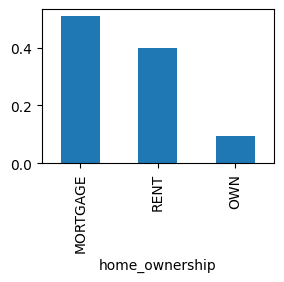

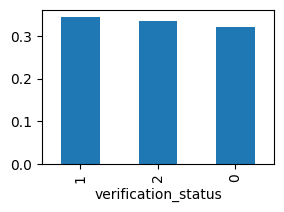

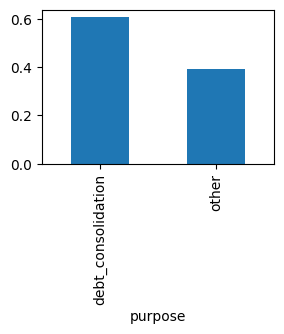

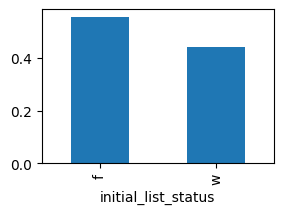

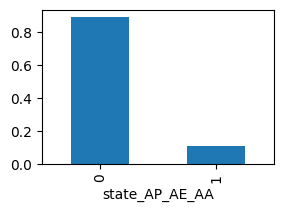

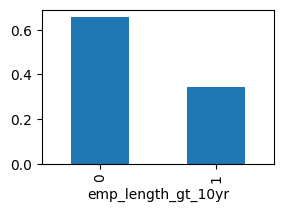

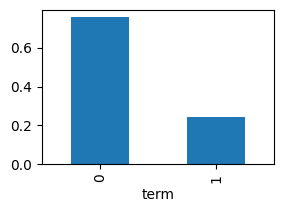

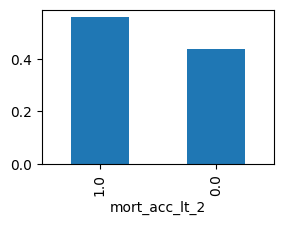

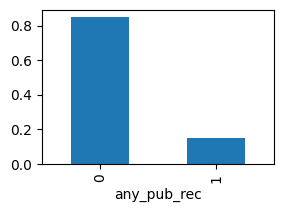

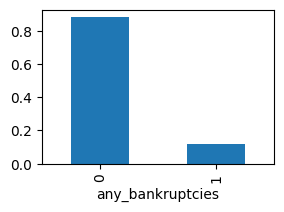

In [118]:
df=df[~df['home_ownership'].str.contains('other')]

barplotcols=['home_ownership','verification_status','purpose','initial_list_status','state_AP_AE_AA',
             'emp_length_gt_10yr','term','mort_acc_lt_2','any_pub_rec','any_bankruptcies']

for f in barplotcols:
    plt.figure(figsize=(3,2))
    df[f].value_counts(normalize=True).plot(kind='bar')
    

Numeric variables

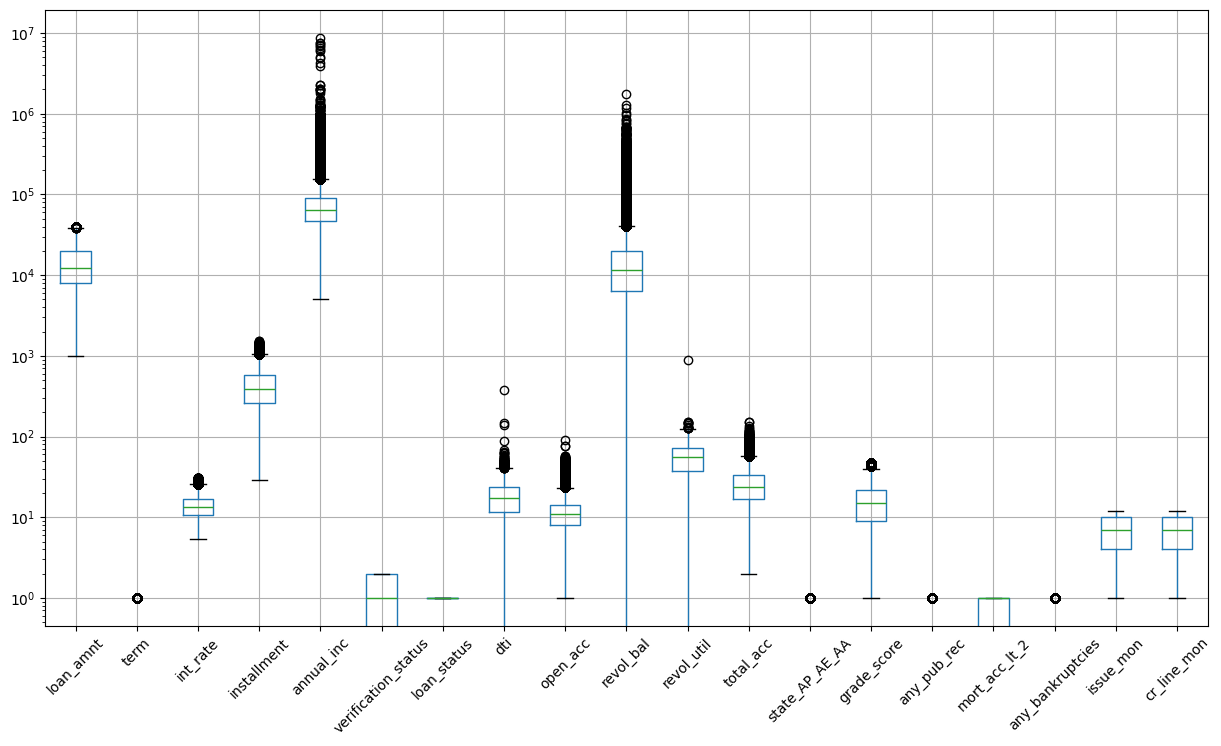

In [119]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

In [120]:
print('ncolumns='+str(df.shape[1]))

outlier_numericcols=['annual_inc','revol_bal','dti','open_acc','revol_bal','revol_util','total_acc']
for f in outlier_numericcols:
    if df[f].dtypes==object:
        continue
    q1,q3=np.percentile(df[f],[25,75])
    iqr=q3-q1
    df=df[np.logical_and(df[f]<=q3+1.5*iqr, df[f]>=q1-1.5*iqr)]
    print(df.shape)


ncolumns=27
(320207, 27)
(304629, 27)
(304453, 27)
(296898, 27)
(291035, 27)
(291024, 27)
(286687, 27)


In [121]:
# len(barplotcols) + len(histograms)

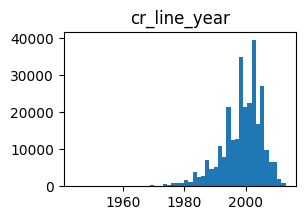

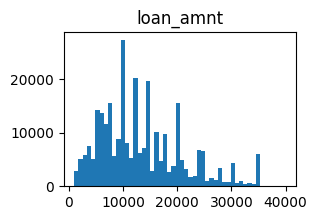

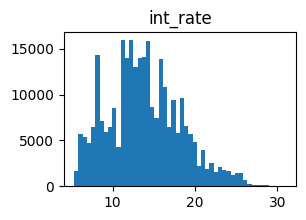

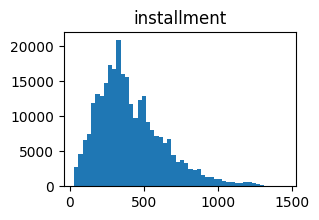

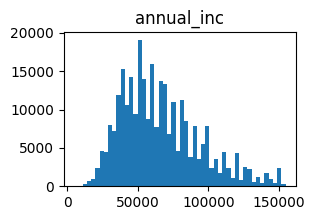

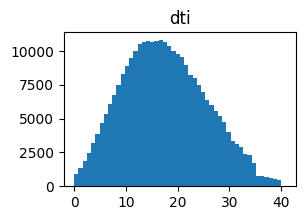

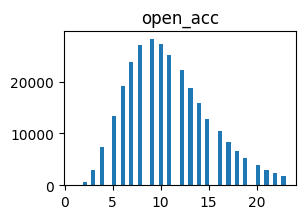

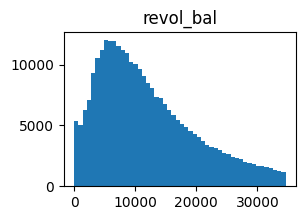

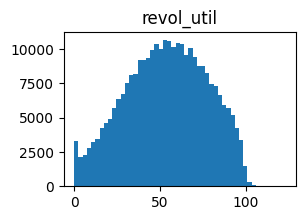

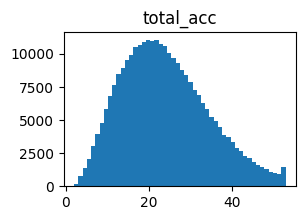

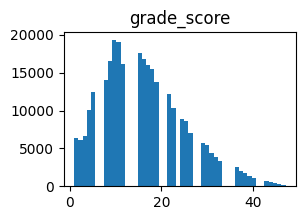

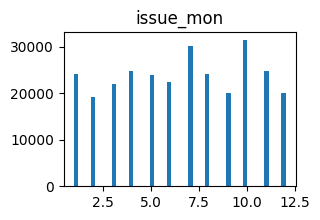

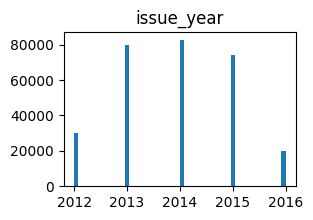

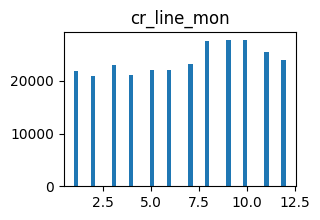

In [122]:
df['cr_line_year']=pd.to_numeric(df['cr_line_year'])
df['issue_year']=pd.to_numeric(df['issue_year'])

histograms=['cr_line_year','loan_amnt','int_rate','installment','annual_inc','dti',
            'open_acc','revol_bal','revol_util','total_acc','grade_score','issue_mon','issue_year','cr_line_mon']

for f in histograms:
    plt.figure(figsize=(3,2))
    plt.hist(df[f],bins=50)
    plt.title(f)



In [123]:
print(df[histograms].describe())
print(df.shape)

        cr_line_year      loan_amnt       int_rate    installment  \
count  286687.000000  286687.000000  286687.000000  286687.000000   
mean     1998.797061   13478.815834      13.838534     414.985484   
std         6.764537    7664.092951       4.456300     228.517399   
min      1944.000000    1000.000000       5.320000      28.750000   
25%      1995.000000    8000.000000      10.990000     252.640000   
50%      2000.000000   12000.000000      13.530000     367.410000   
75%      2003.000000   18000.000000      16.780000     536.810000   
max      2013.000000   40000.000000      30.990000    1458.250000   

          annual_inc            dti       open_acc      revol_bal  \
count  286687.000000  286687.000000  286687.000000  286687.000000   
mean    65892.841778      17.530006      10.803919   12022.713109   
std     28091.533670       8.021223       4.243623    7981.326284   
min      5000.000000       0.000000       1.000000       0.000000   
25%     45000.000000      11.5200

Feature interactions and correlation with outcome

In [124]:
# for f in histograms:
#     sns.displot(data=df,x=f,hue='loan_status')

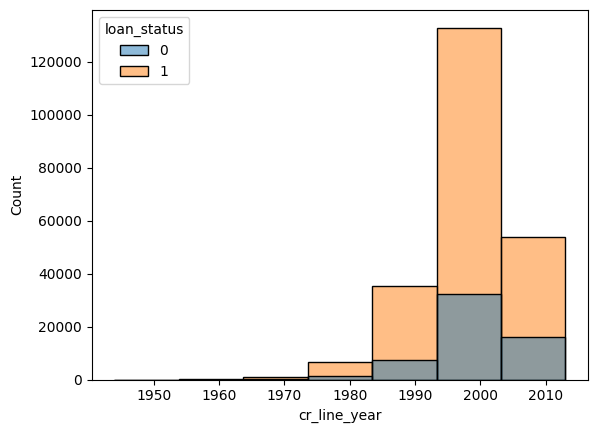

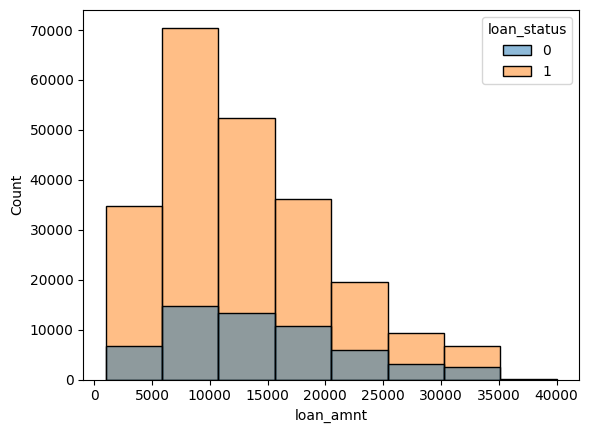

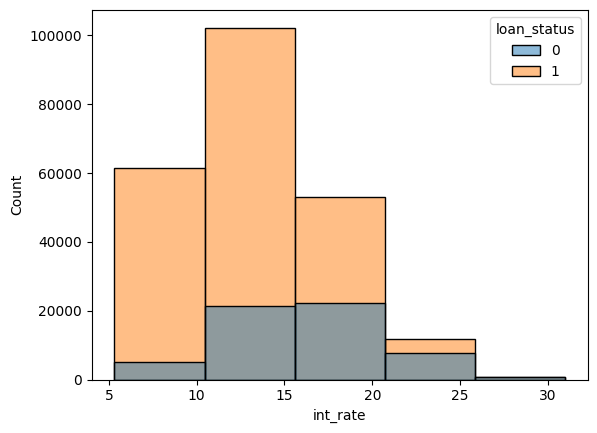

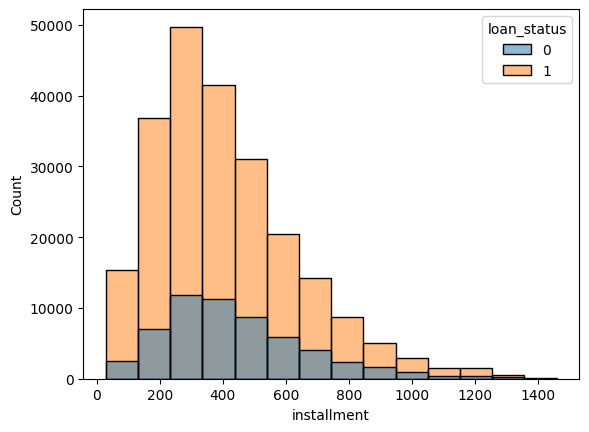

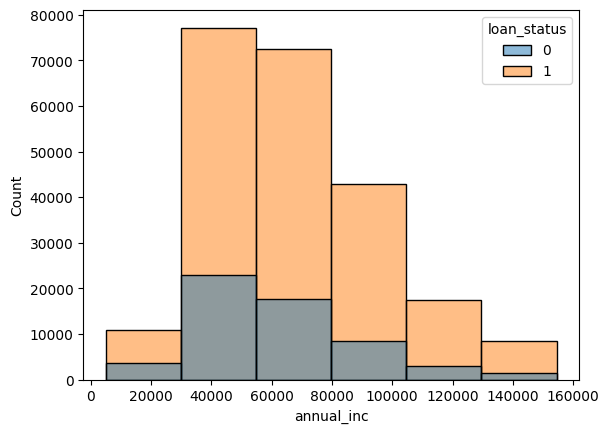

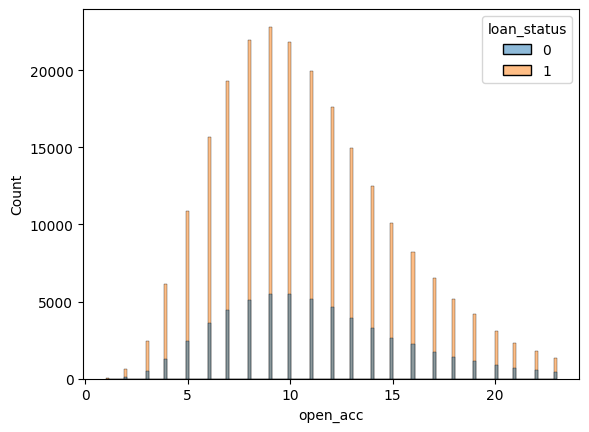

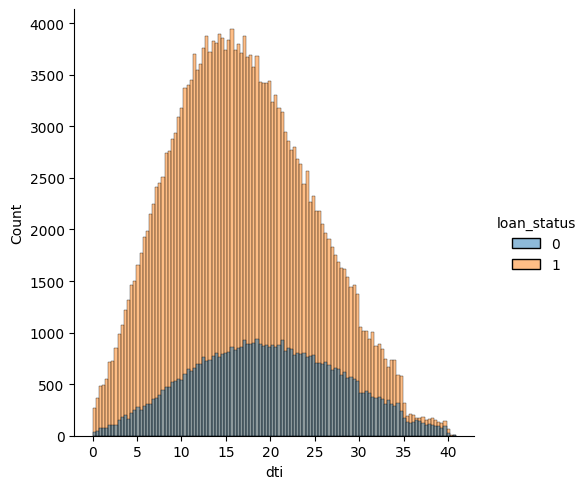

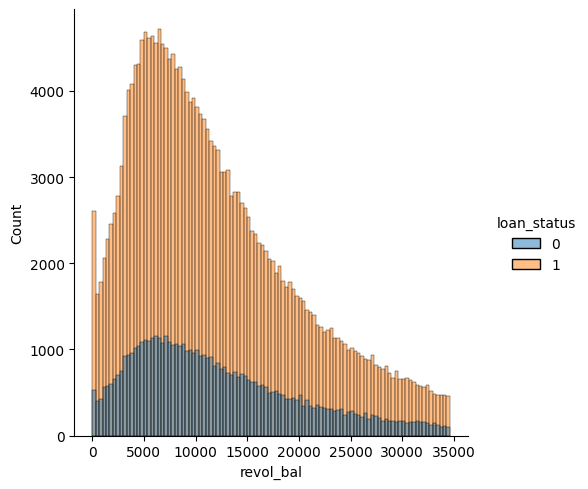

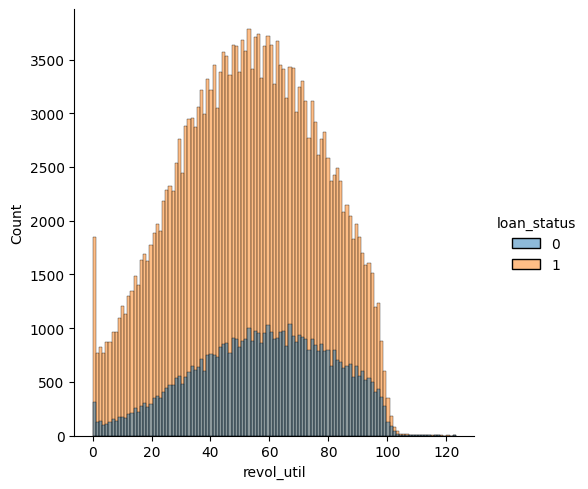

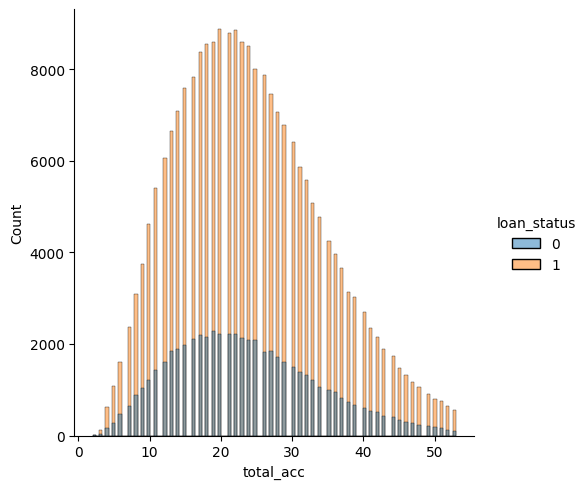

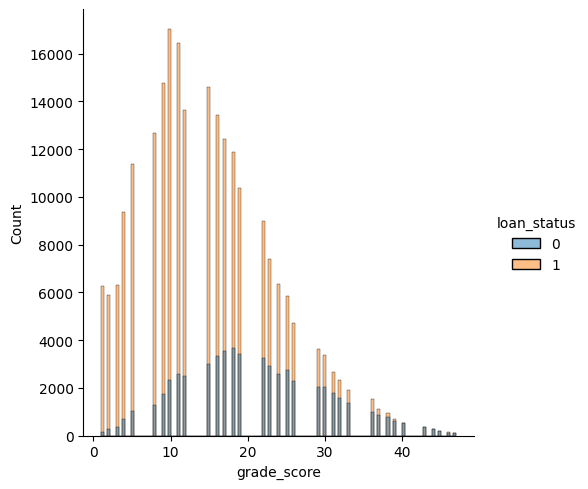

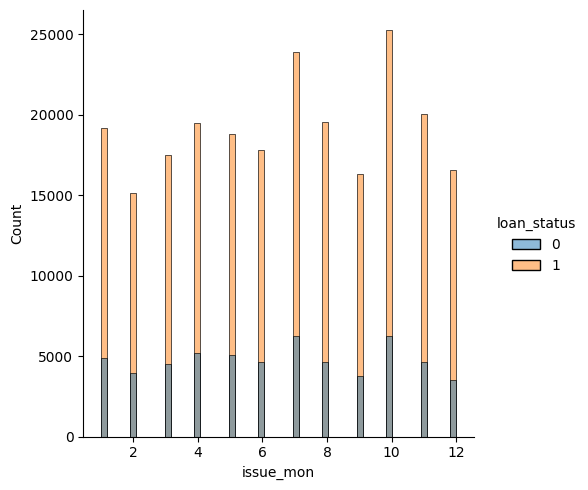

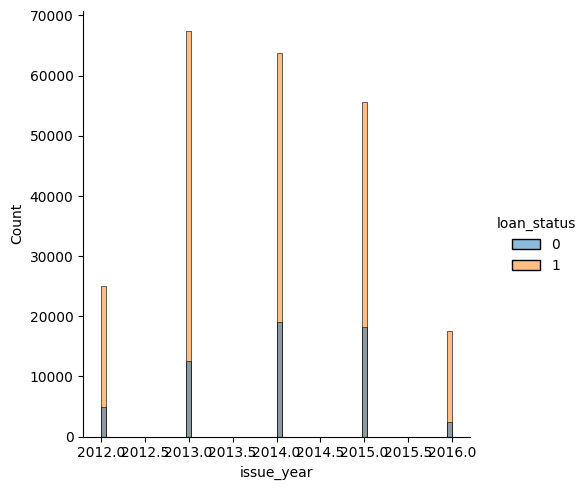

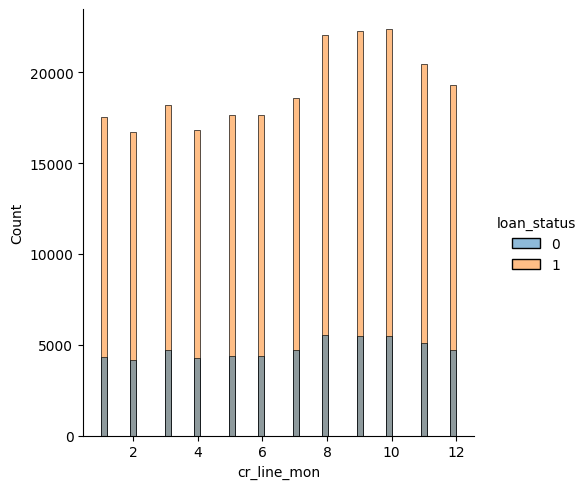

In [125]:
import seaborn as sns

histograms=['cr_line_year','loan_amnt','int_rate','installment','annual_inc','dti',
            'open_acc','revol_bal','revol_util','total_acc','grade_score','issue_mon','issue_year','cr_line_mon']

plt.figure()
sns.histplot(data=df, x='cr_line_year',binwidth=10, hue="loan_status",stat='count')

plt.figure()
sns.histplot(data=df, x='loan_amnt',binwidth=5000, hue="loan_status",stat='count')

plt.figure()
sns.histplot(data=df, x='int_rate',binwidth=5, hue="loan_status",stat='count')

plt.figure()
sns.histplot(data=df, x='installment',binwidth=100, hue="loan_status",stat='count')

plt.figure()
sns.histplot(data=df, x='annual_inc',binwidth=25000, hue="loan_status",stat='count')

plt.figure()
sns.histplot(data=df, x='open_acc',hue="loan_status")

for f in ['dti','revol_bal','revol_util','total_acc','grade_score','issue_mon','issue_year','cr_line_mon']:
    sns.displot(data=df,x=f,hue="loan_status")


Feature distributions are similar between the two outcome groups

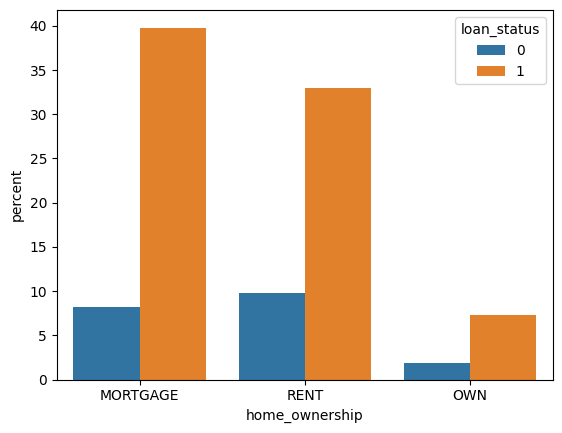

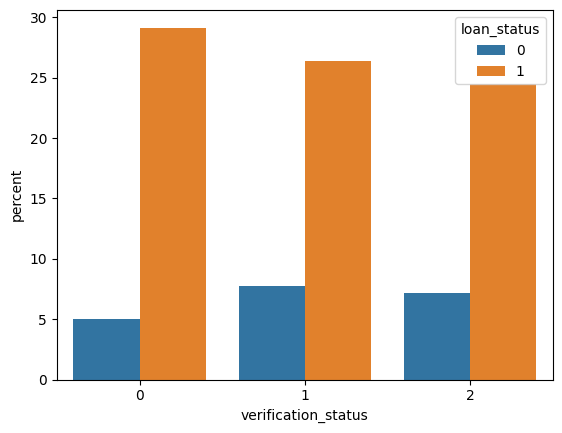

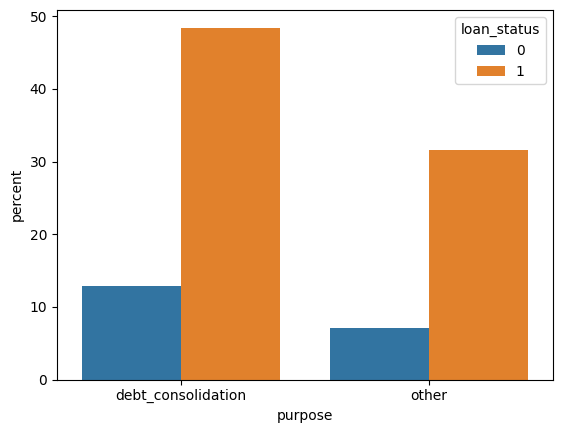

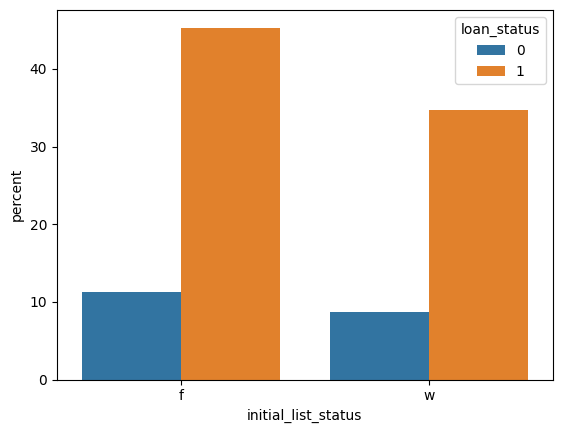

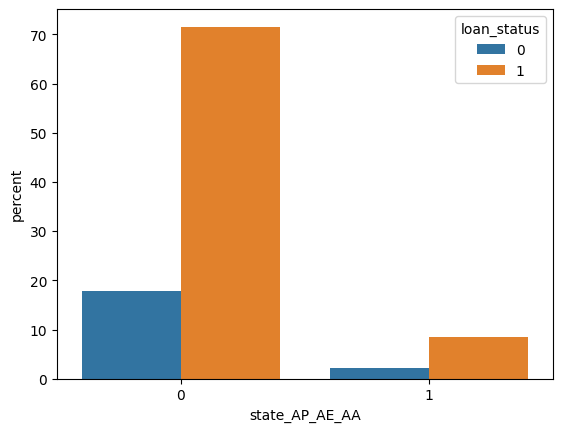

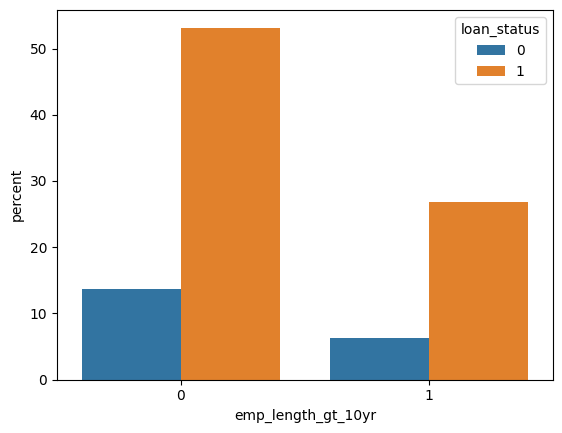

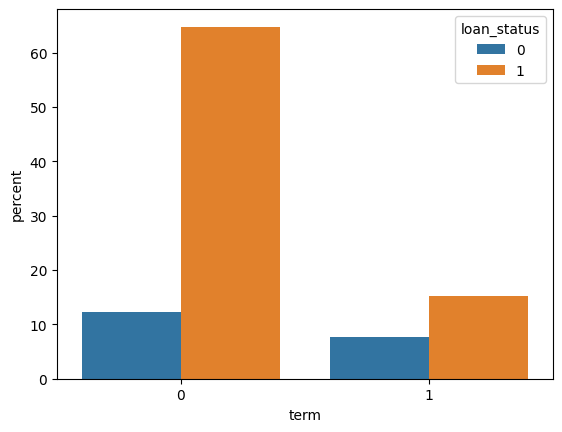

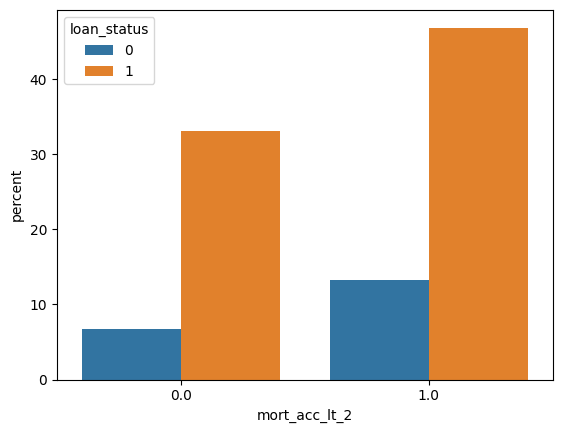

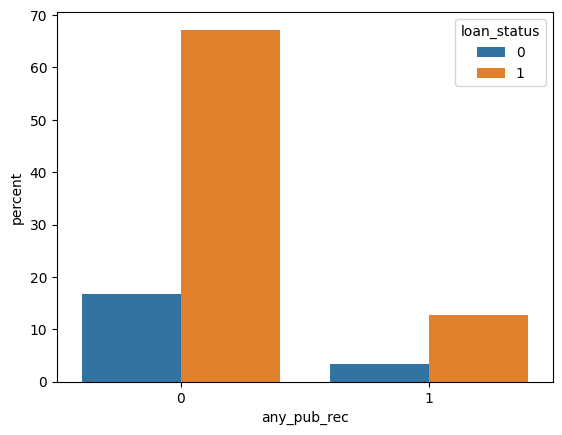

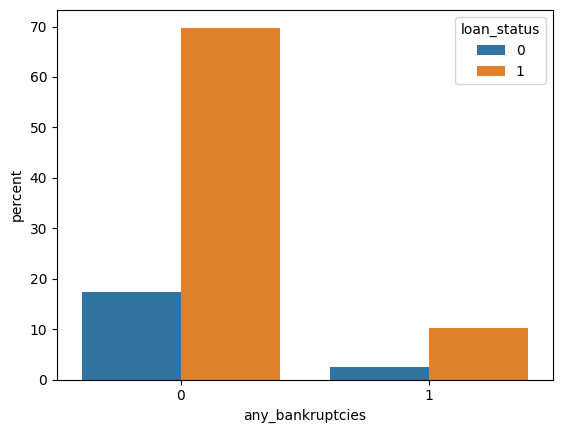

In [126]:
# for f in barplotcols:
for feature in barplotcols:
    plt.figure()
    sns.countplot(data=df, x=feature,hue='loan_status',stat='percent')

Feature- outcome significance hypothesis testing

In [127]:
from scipy.stats import f_oneway,kruskal,ttest_ind,chi2_contingency


Categorical features

H0: Categorical feature and outcome are independent

H1: Categorical feature and outcome are dependent

In [128]:
for categorical_feat in barplotcols:
    feat_crosstab=pd.crosstab(columns=df[categorical_feat],index=df['loan_status'])
    print(feat_crosstab)
    t_stats, p_value, dof, array = chi2_contingency (feat_crosstab)
    print("dof="+str(dof)+"; p_value="+str(p_value))
    if p_value < 0.05:
      print(categorical_feat+" - Null hypothesis is rejected")
    else:
      print(categorical_feat+" - Null hypothesis cannot be rejected")
    print('\n')

home_ownership  MORTGAGE    OWN   RENT
loan_status                           
0                  23679   5405  28152
1                 114106  20909  94436
dof=2; p_value=1.763576958489009e-296
home_ownership - Null hypothesis is rejected


verification_status      0      1      2
loan_status                             
0                    14461  22164  20611
1                    83573  75614  70264
dof=2; p_value=0.0
verification_status - Null hypothesis is rejected


purpose      debt_consolidation  other
loan_status                           
0                         36860  20376
1                        138847  90604
dof=1; p_value=2.2251629949494354e-65
purpose - Null hypothesis is rejected


initial_list_status       f      w
loan_status                       
0                     32465  24771
1                    129950  99501
dof=1; p_value=0.7134777860022453
initial_list_status - Null hypothesis cannot be rejected


state_AP_AE_AA       0      1
loan_status                

In [129]:
# feat_crosstab=pd.crosstab(columns=df['loan_status'],index=df['home_ownership'])
# print(feat_crosstab)
# t_stats, p_value, dof, array = chi2_contingency (feat_crosstab)
# print("dof="+str(dof)+"; p_value="+str(p_value))
# if p_value < 0.05:
#   print(categorical_feat+" - Null hypothesis is rejected")
# else:
#   print(categorical_feat+" - Null hypothesis cannot be rejected")

# df['issue_year']=pd.to_numeric(df['issue_year'])

# t_stats, p_value = ttest_ind(df[df['loan_status'] == 'Fully Paid']['issue_year'],
#                                  df[df['loan_status'] == 'Charged Off']['issue_year'])

# print(p_value)

In [130]:
for numerical_feat in histograms:
    t_stats, p_value = ttest_ind(df[df['loan_status'] == 1][numerical_feat],
                                 df[df['loan_status'] == 0][numerical_feat])
    print("t_stats :",t_stats)
    print("p_value",p_value)
    if p_value < 0.05:
      print(numerical_feat+" - Null hypothesis is rejected")
    else:
      print(numerical_feat+" - Null hypothesis cannot be rejected")    
    print('\n')

t_stats : -23.349955870608213
p_value 1.7889461992518036e-120
cr_line_year - Null hypothesis is rejected


t_stats : -40.55338085215028
p_value 0.0
loan_amnt - Null hypothesis is rejected


t_stats : -138.60392441101564
p_value 0.0
int_rate - Null hypothesis is rejected


t_stats : -29.47932700343752
p_value 1.0242279198452322e-190
installment - Null hypothesis is rejected


t_stats : 42.855642767688266
p_value 0.0
annual_inc - Null hypothesis is rejected


t_stats : -71.06444732915335
p_value 0.0
dti - Null hypothesis is rejected


t_stats : -15.977004947586867
p_value 1.957009408716408e-57
open_acc - Null hypothesis is rejected


t_stats : -3.651711085473575
p_value 0.00026054517172090306
revol_bal - Null hypothesis is rejected


t_stats : -42.73164819253318
p_value 0.0
revol_util - Null hypothesis is rejected


t_stats : 12.778424389424272
p_value 2.215608513720752e-37
total_acc - Null hypothesis is rejected


t_stats : -149.75283500794146
p_value 0.0
grade_score - Null hypothesis i

In [131]:
df=df.drop(columns=['title','initial_list_status','state_AP_AE_AA','cr_line_mon','application_type'])


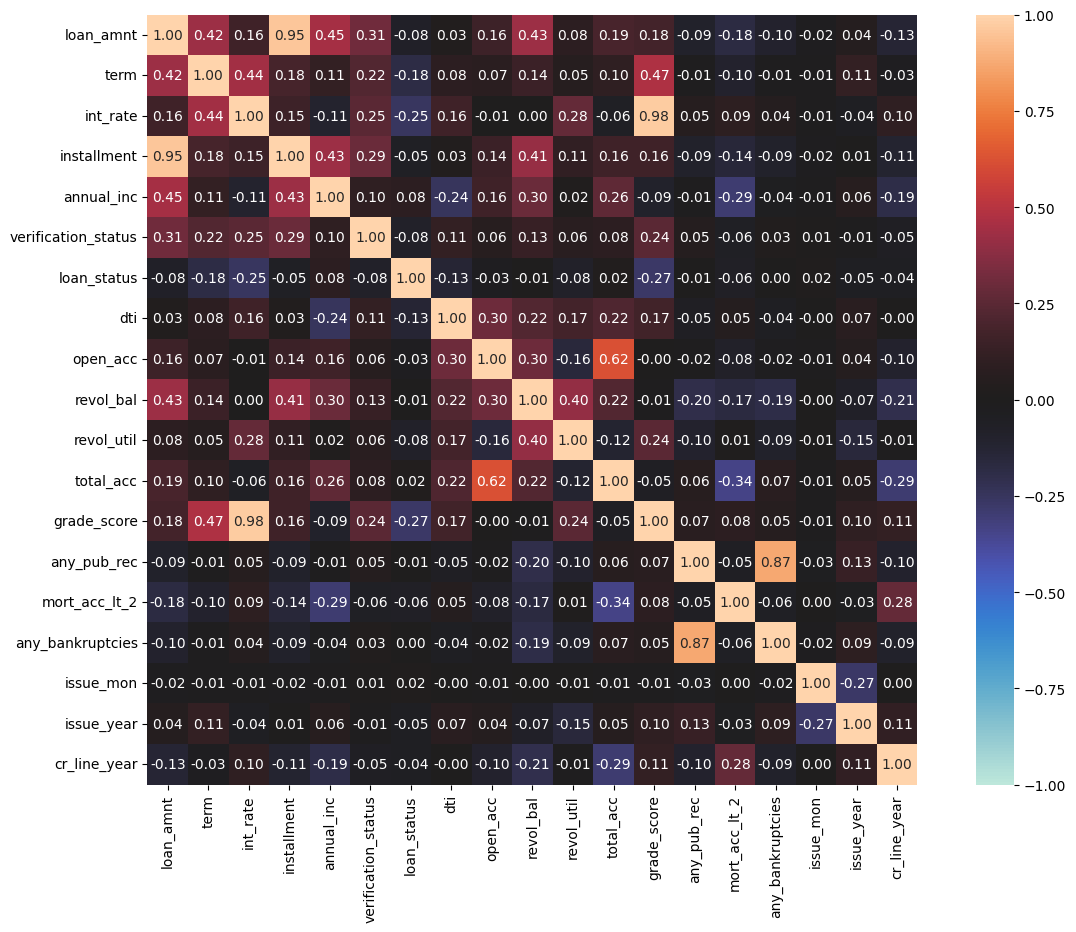

In [132]:
import seaborn as sns


correlation_matrix = df.select_dtypes(include=[np.number]).corr()  # Fill in the blank to compute correlation

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0,square=True, 
            annot=True, fmt=".2f")  # Fill in the blank to plot the heatmap

# Show the plot
plt.show()

In [133]:
correlation_matrix.loan_status.sort_values(key=lambda x: abs(x),ascending=False)

loan_status            1.000000
grade_score           -0.269351
int_rate              -0.250604
term                  -0.183323
dti                   -0.131570
verification_status   -0.081514
annual_inc             0.079785
revol_util            -0.079555
loan_amnt             -0.075524
mort_acc_lt_2         -0.064521
installment           -0.054974
issue_year            -0.046684
cr_line_year          -0.043568
open_acc              -0.029826
total_acc              0.023859
issue_mon              0.019818
revol_bal             -0.006820
any_pub_rec           -0.006157
any_bankruptcies       0.002224
Name: loan_status, dtype: float64

In [134]:
for col in correlation_matrix.columns:
    feat_corrs=correlation_matrix[col].sort_values(key=lambda x: abs(x),ascending=False)
    print("feature = "+col)
    print(feat_corrs[1:6])
    print('\n')

feature = loan_amnt
installment            0.953564
annual_inc             0.445617
revol_bal              0.427406
term                   0.423878
verification_status    0.308816
Name: loan_amnt, dtype: float64


feature = term
grade_score            0.472306
int_rate               0.439325
loan_amnt              0.423878
verification_status    0.222819
loan_status           -0.183323
Name: term, dtype: float64


feature = int_rate
grade_score            0.975536
term                   0.439325
revol_util             0.277844
loan_status           -0.250604
verification_status    0.247857
Name: int_rate, dtype: float64


feature = installment
loan_amnt              0.953564
annual_inc             0.425530
revol_bal              0.410629
verification_status    0.293365
term                   0.179877
Name: installment, dtype: float64


feature = annual_inc
loan_amnt        0.445617
installment      0.425530
revol_bal        0.296659
mort_acc_lt_2   -0.291292
total_acc        0.263642
N

In [135]:
# correlation_matrix

Top correlated features for loan_status are grade_score, int_rate, term, dti in this descending order

Regression

In [136]:
# onehot encoding for categorical variables

# Scaling for numerical variables
# df.select_dtypes(include=['object']).columns

In [137]:
# df.head()
# df=df.drop(columns=['title','initial_list_status','state_AP_AE_AA','cr_line_mon','application_type'])

In [138]:
# df[['home_ownership', 'purpose','emp_length_gt_10yr', 'term', 'mort_acc_lt_2', 'any_pub_rec', 'any_bankruptcies']].head()

In [139]:
# label_encoding_cols=['purpose','emp_length_gt_10yr', 'term', 'mort_acc_lt_2', 'any_pub_rec', 'any_bankruptcies']
# df_binarycat=df[label_encoding_cols]

# df_label_encoded=df_binarycat.apply(LabelEncoder().fit_transform)

# print(df_label_encoded.head())


In [140]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

df_numerical=df[['loan_amnt','int_rate','installment','annual_inc','dti',
            'open_acc','revol_bal','revol_util','total_acc','grade_score','issue_mon','issue_year','cr_line_year']]
# df_numerical.head()
df_multicat=df['home_ownership']

label_encoding_cols=['purpose','emp_length_gt_10yr', 'term', 'mort_acc_lt_2', 'any_pub_rec', 'any_bankruptcies']
df_binarycat=df[label_encoding_cols]

# OneHot encoding
df_onehot_encoded=pd.get_dummies(df['home_ownership'])

# df_encoded = pd.concat([df, one_hot_df], axis=1)
# df_encoded = df_encoded.drop(onehot_encoding_cols, axis=1)

# Label encoding
label_encoding_cols=['purpose','emp_length_gt_10yr', 'term', 'mort_acc_lt_2', 'any_pub_rec', 'any_bankruptcies']
df_binarycat=df[label_encoding_cols]

df_label_encoded=df_binarycat.apply(LabelEncoder().fit_transform)

# merging the df back
df_processed=pd.concat([df_numerical,df_label_encoded,df_onehot_encoded],axis=1)
df_processed.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,grade_score,...,cr_line_year,purpose,emp_length_gt_10yr,term,mort_acc_lt_2,any_pub_rec,any_bankruptcies,MORTGAGE,OWN,RENT
1,8000.0,11.99,265.68,65000.0,22.05,17.0,20131.0,53.3,27.0,12,...,2004,0,0,0,0,0,0,True,False,False
2,15600.0,10.49,506.97,43057.0,12.79,13.0,11987.0,92.2,26.0,10,...,2007,1,0,0,1,0,0,False,False,True
3,7200.0,6.49,220.65,54000.0,2.60,6.0,5472.0,21.5,13.0,2,...,2006,1,0,0,1,0,0,False,False,True
4,24375.0,17.27,609.33,55000.0,33.95,13.0,24584.0,69.8,43.0,19,...,1999,1,0,1,1,0,0,True,False,False
5,20000.0,13.33,677.07,86788.0,16.31,8.0,25757.0,100.6,23.0,17,...,2005,0,1,0,0,0,0,True,False,False


In [162]:
df.describe()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,grade_score,any_pub_rec,mort_acc_lt_2,any_bankruptcies,issue_mon,issue_year,cr_line_year
count,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000,286687.000000
mean,13478.815834,0.229048,13.838534,414.985484,65892.841778,0.975029,0.800354,17.530006,10.803919,12022.713109,53.735827,23.994729,15.944037,0.160977,0.601402,0.127630,6.602106,2013.909476,1998.797061
std,7664.092951,0.420221,4.456300,228.517399,28091.533670,0.811367,0.399735,8.021223,4.243623,7981.326284,23.763456,10.170196,9.082924,0.367510,0.489611,0.333678,3.379442,1.107343,6.764537
min,1000.000000,0.000000,5.320000,28.750000,5000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2012.000000,1944.000000
25%,8000.000000,0.000000,10.990000,252.640000,45000.000000,0.000000,1.000000,11.520000,8.000000,5815.000000,36.400000,16.000000,9.000000,0.000000,0.000000,0.000000,4.000000,2013.000000,1995.000000
50%,12000.000000,0.000000,13.530000,367.410000,60000.000000,1.000000,1.000000,17.060000,10.000000,10278.000000,54.500000,23.000000,15.000000,0.000000,1.000000,0.000000,7.000000,2014.000000,2000.000000
75%,18000.000000,0.000000,16.780000,536.810000,82000.000000,2.000000,1.000000,23.150000,13.000000,16796.000000,72.000000,31.000000,22.000000,0.000000,1.000000,0.000000,10.000000,2015.000000,2003.000000
max,40000.000000,1.000000,30.990000,1458.250000,154500.000000,2.000000,1.000000,40.890000,23.000000,34619.000000,123.300000,53.000000,47.000000,1.000000,1.000000,1.000000,12.000000,2016.000000,2013.000000


In [141]:
# df['loan_status']=df['loan_status'].replace({'Fully Paid':1,'Charged Off':0})

In [142]:
from sklearn.model_selection import train_test_split

X=df_processed
y=df['loan_status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.value_counts())

(200680, 22)
(200680,)
(86007, 22)
(86007,)
loan_status
1    160549
0     40131
Name: count, dtype: int64


In [164]:
y.head()

1    1
2    1
3    1
4    0
5    1
Name: loan_status, dtype: int64

In [163]:
X_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,grade_score,...,cr_line_year,purpose,emp_length_gt_10yr,term,mort_acc_lt_2,any_pub_rec,any_bankruptcies,MORTGAGE,OWN,RENT
93555,5250.0,5.32,158.11,50000.0,26.62,10.0,11210.0,34.6,36.0,1,...,1995,0,0,0,0,1,1,True,False,False
335923,35000.0,23.83,1003.43,94000.0,4.59,4.0,12806.0,80.0,7.0,40,...,2006,0,0,1,1,0,0,False,False,True
10786,10000.0,10.15,323.38,32000.0,21.87,12.0,13634.0,60.3,22.0,9,...,2003,1,0,0,1,1,0,False,False,True
140651,28650.0,25.78,854.07,70000.0,32.11,10.0,30813.0,84.9,23.0,40,...,2002,1,1,1,1,0,0,True,False,False
216454,14400.0,14.33,494.47,90000.0,9.84,13.0,19187.0,52.3,28.0,15,...,2002,0,1,0,0,0,0,True,False,False


In [145]:
stdscale=StandardScaler()
X_train_scaled=stdscale.fit_transform(X_train)
X_test_scaled=stdscale.transform(X_test)

In [166]:
X_test_scaled

array([[-0.97610835, -1.33312005, -0.99521236, ..., -0.96043906,
        -0.31772574,  1.15492041],
       [-0.97610835,  0.76970491, -0.87712433, ..., -0.96043906,
         3.14736859, -0.86586053],
       [-0.58475182, -0.41523808, -0.50876669, ..., -0.96043906,
        -0.31772574,  1.15492041],
       ...,
       [ 1.50248302, -1.27028217,  0.41116447, ...,  1.04119047,
        -0.31772574, -0.86586053],
       [ 1.58075432, -0.19081706,  1.95786386, ...,  1.04119047,
        -0.31772574, -0.86586053],
       [-1.05764096,  0.52957442, -0.98750906, ...,  1.04119047,
        -0.31772574, -0.86586053]])

In [167]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression().fit(X_train_scaled,y_train)

# print(logreg)
print(logreg.score(X_train_scaled,y_train))
# print(accuracy_score(y_train,logreg.predict(X_train)))

y_pred=logreg.predict(X_test_scaled)

0.8012208491130157


/home/madhav/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


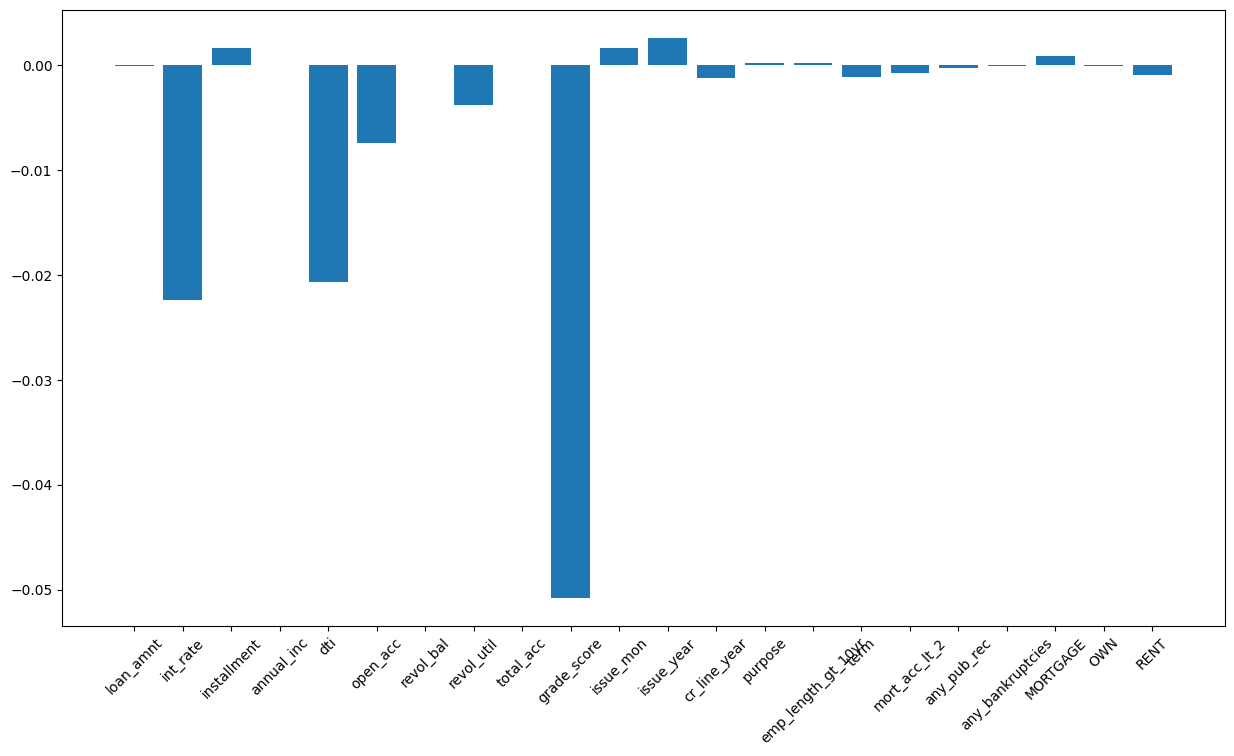

In [168]:
# print(logreg.coef_[0])
# print(logreg.feature_names_in_)
plt.figure(figsize=(15,8))
plt.bar(X_train.columns,logreg.coef_[0])
plt.xticks(rotation=45)
# plt.yscale("log")
plt.show()

In [169]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

print('Training accuracy = '+str(logreg.score(X_train,y_train)))
# print(accuracy_score(y_train,logreg.predict(X_train)))

y_pred=logreg.predict(X_test)

Training accuracy = 0.8012208491130157


Testing accuracy = 0.8014347669375749
[[ 1258 15847]
 [ 1231 67671]]


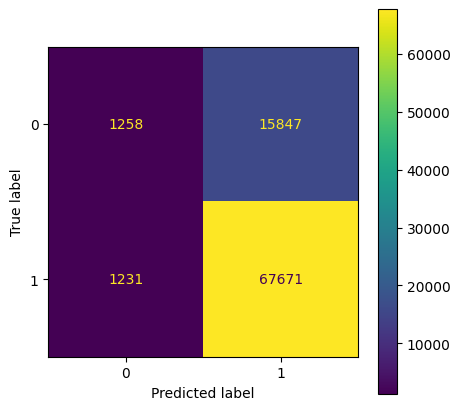

In [170]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

print('Testing accuracy = '+str(accuracy_score(y_test,y_pred)))

conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
      
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_mat).plot(ax = ax)

In [171]:
from sklearn.metrics import precision_score, recall_score

print("precision = "+str(precision_score(y_test,y_pred)))
print("recall = "+str(recall_score(y_test,y_pred)))

precision = 0.8102564716588041
recall = 0.9821340454558648


Running with SMOTE

In [151]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_train_sm,y_sm=smt.fit_resample(X_train_scaled,y_train)

print(y_sm.value_counts())

logreg_smote=LogisticRegression().fit(X_train_sm,y_sm)
print("Training accuracy = "+str(logreg_smote.score(X_train_sm,y_sm)))

y_pred_sm=logreg_smote.predict(X_test_scaled)
print("Testing accuracy = "+str(accuracy_score(y_test,y_pred_sm)))


loan_status
1    160549
0    160549
Name: count, dtype: int64
Training accuracy = 0.66039651445976
Testing accuracy = 0.6698989617124188


precision = 0.8813087103028934
recall = 0.6794577806159473


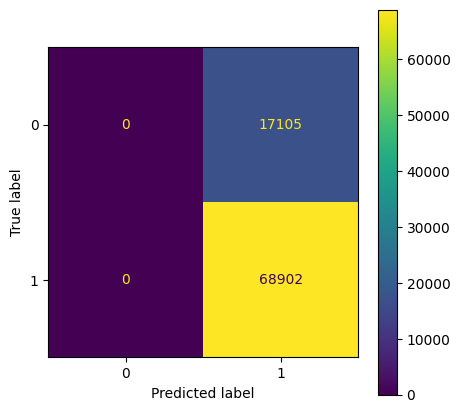

In [152]:
conf_mat_sm=confusion_matrix(y_test,y_pred_sm)

fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_mat).plot(ax = ax)

from sklearn.metrics import precision_score, recall_score

print("precision = "+str(precision_score(y_test,y_pred_sm)))
print("recall = "+str(recall_score(y_test,y_pred_sm)))

Running with fewer variables

In [153]:
X_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,grade_score,...,cr_line_year,purpose,emp_length_gt_10yr,term,mort_acc_lt_2,any_pub_rec,any_bankruptcies,MORTGAGE,OWN,RENT
93555,5250.0,5.32,158.11,50000.0,26.62,10.0,11210.0,34.6,36.0,1,...,1995,0,0,0,0,1,1,True,False,False
335923,35000.0,23.83,1003.43,94000.0,4.59,4.0,12806.0,80.0,7.0,40,...,2006,0,0,1,1,0,0,False,False,True
10786,10000.0,10.15,323.38,32000.0,21.87,12.0,13634.0,60.3,22.0,9,...,2003,1,0,0,1,1,0,False,False,True
140651,28650.0,25.78,854.07,70000.0,32.11,10.0,30813.0,84.9,23.0,40,...,2002,1,1,1,1,0,0,True,False,False
216454,14400.0,14.33,494.47,90000.0,9.84,13.0,19187.0,52.3,28.0,15,...,2002,0,1,0,0,0,0,True,False,False


In [154]:
stdscale=StandardScaler()

selfeatures=['grade_score', 'int_rate', 'term','dti', 'open_acc']
X_train_few_scaled=stdscale.fit_transform(X_train[selfeatures])
X_test_few_scaled=stdscale.transform(X_test[selfeatures])

logreg=LogisticRegression().fit(X_train_few_scaled,y_train)

# print(logreg)
print("Training accuracy = "+str(logreg.score(X_train_few_scaled,y_train)))

y_pred_few=logreg.predict(X_test_few_scaled)
print("Testing accuracy = "+str(accuracy_score(y_test,y_pred_few)))


Training accuracy = 0.8009766792904126
Testing accuracy = 0.8007604032229935


In [155]:
X_train[selfeatures]


,grade_score,int_rate,term,dti,open_acc
93555,1,5.32,0,26.62,10.0
335923,40,23.83,1,4.59,4.0
10786,9,10.15,0,21.87,12.0
140651,40,25.78,1,32.11,10.0
216454,15,14.33,0,9.84,13.0
...,...,...,...,...,...
15384,5,7.89,0,22.12,14.0
66147,15,13.98,0,7.14,10.0
106220,8,10.16,0,13.56,8.0
274059,12,11.99,0,26.80,5.0


precision = 0.8114081524616199
recall = 0.9787959710893733


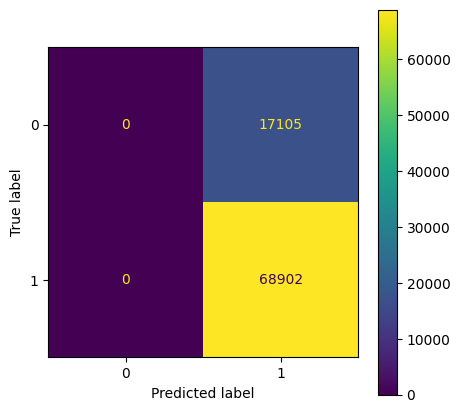

In [156]:
conf_mat_sm=confusion_matrix(y_test,y_pred_few)

fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_mat).plot(ax = ax)

from sklearn.metrics import precision_score, recall_score

print("precision = "+str(precision_score(y_test,y_pred_few)))
print("recall = "+str(recall_score(y_test,y_pred_few)))

In [157]:
TP = conf_mat[1,1]
FP = conf_mat[0,1]

TN = conf_mat[0,0]
FN = conf_mat[1,0]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print('TPR = ',str(TPR))
print('FPR = ',str(FPR))

TPR =  1.0
FPR =  1.0


ROC curve 

In [158]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob_few=logreg.predict_proba(X_test_few_scaled)
print(pred_prob_few)

[[0.09727629 0.90272371]
 [0.15373164 0.84626836]
 [0.09435121 0.90564879]
 ...
 [0.19591472 0.80408528]
 [0.15292839 0.84707161]
 [0.15137613 0.84862387]]


In [159]:
posclass_proba=pred_prob_few[:,1]
print(posclass_proba)

[0.90272371 0.84626836 0.90564879 ... 0.80408528 0.84707161 0.84862387]


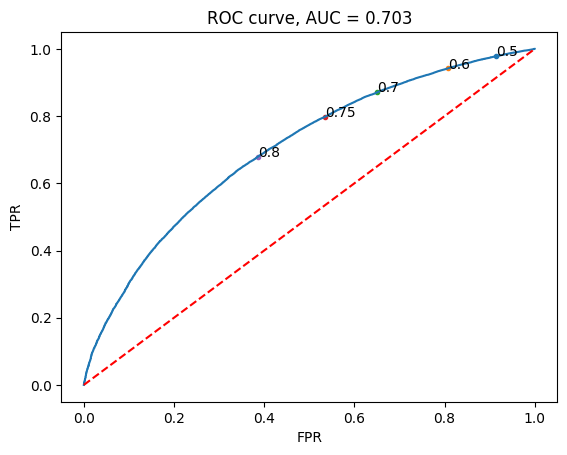

In [160]:
fpr,tpr,thr=roc_curve(y_test,posclass_proba)
eps=1e-3
AUC=roc_auc_score(y_test,posclass_proba)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
for t in [0.5,0.6,0.7,0.75,0.8]:
    inx=(thr-t<eps) & (t-thr<eps)
    fpr_val=fpr[inx][0]
    tpr_val=tpr[inx][0]
    plt.scatter(fpr_val,tpr_val,marker='.')
    plt.text(fpr_val,tpr_val,t)
plt.title('ROC curve, AUC = '+str(round(AUC,3)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

The deafult threshold of 0.5 is not ideal as it results in very high FPR that means the model would recommend extending loan to a defaulting customer as well

A threshold betwen 0.75-0.8 seems appropriate to curtail the losses while keeping profits from TPR high

In [161]:
for t in [0.2,0.4,0.5,0.6,0.8]:
    print(t)
    inx=(thr-t<eps) & (t-thr<eps)
    print(inx)
    fpr_val=fpr[inx][0]
    tpr_val=tpr[inx][0]


0.2
[False False False ... False False False]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
len(thr)

In [ ]:
thr

In [ ]:
plt.scatter(range(len(thr)),thr)

In [ ]:
thr[(thr-0.5<0.0001) & (0.5-thr<0.0001)]

In [ ]:
(thr-0.5<0.0001) & (0.5-thr<0.0001)

In [ ]:
thr[(thr-0.5<0.0001) & (0.5-thr<0.0001)][0]